# Have movie lengths been decreasing over time?

We want to answer the question weather the average duration of movies has been declining over the years?
As evidence of this, we have following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively. 

In [27]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

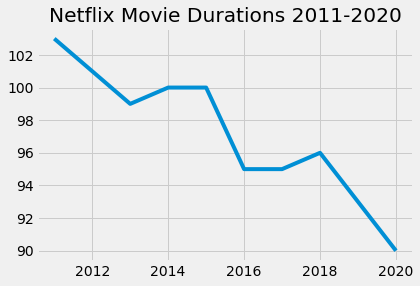

In [28]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict ={'years':years, 'durations':durations}

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Create a figure
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'],durations_df['durations'])

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

# Exploratory data analysis

Based on this limited amount of data, it looks like there is something to the idea that movie lengths have decreased over the past ten years! 
However, we need more data to perform further explorations and see weather this trend is explainable by something like the genre of entertainment.

In [29]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("/Users/allen/Desktop/Datasets/netflix_titles.csv")

# Print the first five rows of the DataFrame
print(netflix_df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Filtering for movies and uniforming the data type

Looking at the first five rows of our new DataFrame, we notice a column type containing movie, TV shows, etc in the dataset! However, we are only interested in movie lengths, so we need to filter for rows where type is Movie and also select only for columns with informative data such as title, country, listed_in, release_year, and duration.
In addition, in order to compare the length of movies, we need to make the data in duration column uniform as float type data, eliminating extra characters such as "min".

In [30]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'release_year', 'duration', 'listed_in']]
netflix_movies_col_subset['duration'] = netflix_movies_col_subset['duration'].str.replace(" min", "").astype(float)
# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head())

                               title  \
0               Dick Johnson Is Dead   
6   My Little Pony: A New Generation   
7                            Sankofa   
9                       The Starling   
12                      Je Suis Karl   

                                              country  release_year  duration  \
0                                       United States          2020      90.0   
6                                                 NaN          2021      91.0   
7   United States, Ghana, Burkina Faso, United Kin...          1993     125.0   
9                                       United States          2021     104.0   
12                            Germany, Czech Republic          2021     127.0   

                                           listed_in  
0                                      Documentaries  
6                           Children & Family Movies  
7   Dramas, Independent Movies, International Movies  
9                                   Comedies, Dramas

/Users/allen/PycharmProjects/pythonProject/pythonProject/demo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Visualizing data as scatter plot

Now we will visualize the year of release on the x-axis and the movie duration on the y-axis as a scatter plot.

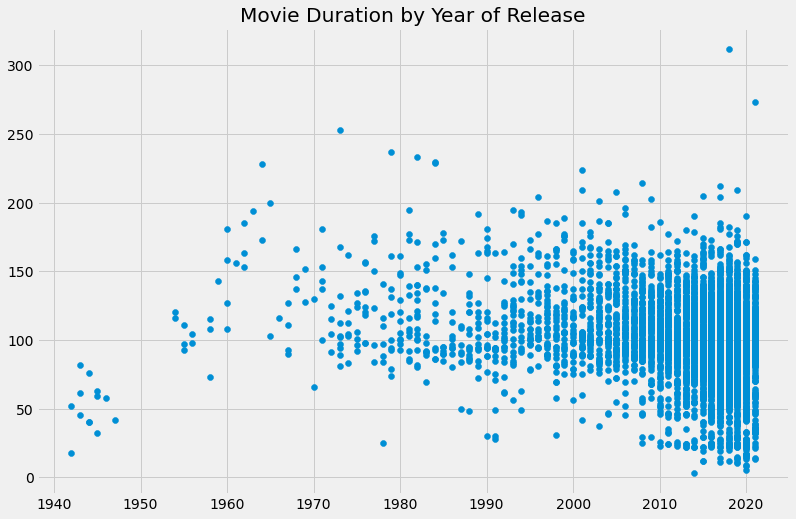

In [31]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

Looking at this plot, it is clear that newer movies have a broader distribution of movie length.
Another intersting observation is that some of these films are under an hour long!
So, let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [32]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title               country  \
45                              My Heroes Were Cowboys                   NaN   
71                         A StoryBots Space Adventure                   NaN   
77                       Little Singham - Black Shadow                   NaN   
279               Monster Hunter: Legends of the Guild  United States, Japan   
470                        Bridgerton - The Afterparty                   NaN   
484                       Lee Su-geun: The Sense Coach                   NaN   
495                                          Awon Boyz                   NaN   
560                                            Audible                   NaN   
694                                              Aziza        Lebanon, Syria   
695                                     Besieged Bread                   NaN   
729                      Bling Empire - The Afterparty                   NaN   
730                         Cobra Kai - 

The majority of films under 60 minutes fall into categories such as "Children", "Stand-Up", and "Documentaries", which is reasonable.
In order to explore the effect of these genres on our data we will plot children_movies, documentary_movies, comedy_movies, and stand-up Comedies and mark them with a different color. We use a for loop to generate a list of colors based on the contents of the listed_in column.

['blue', 'red', 'black', 'orange', 'black', 'red', 'blue', 'black', 'orange', 'red', 'black']


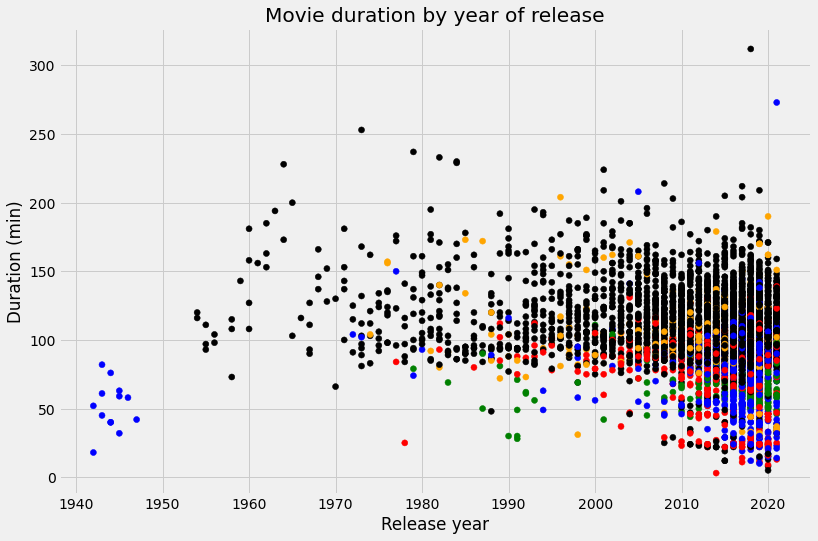

In [33]:
children_movies= short_movies[short_movies['listed_in'].str.contains('Children')]
list_children_movies= children_movies['listed_in'].tolist()
documentary_movies= short_movies[short_movies['listed_in'].str.contains('Documentaries')]
list_documentary_movies = documentary_movies ['listed_in'].tolist()
comedy_movies= short_movies[short_movies['listed_in'].str.contains('Comedies')]
list_comedy_movies = comedy_movies ['listed_in'].tolist()

# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if   row ['listed_in'] in list_children_movies:
        colors.append('red')
    elif row ['listed_in'] in list_documentary_movies:
        colors.append('blue')
    elif row ['listed_in']== 'Stand-Up Comedy':
        colors.append('green')
    elif row['listed_in'] in list_comedy_movies:
        colors.append('orange')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[0:11])

# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'], netflix_movies_col_subset['duration'], c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. So, that is what is dragging down the average of movie length 